<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/main/holdout_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sys
from more_itertools import sliced
import os
import matplotlib.pyplot as plt

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! ls drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/pre-feature\ extract

HOLDOUT_RAW_extracted_data.csv	OLD-Other
OLD-3-24			TrainTest_RAW_extracted_data.csv


In [4]:
df = pd.read_csv('drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/pre-feature extract/TrainTest_RAW_extracted_data.csv')
df

,movie_ID,roi,stack,label,frame,resp,stim1,stim2,stim3,stim4,stim5,stim6,stim7,stim8
0,210728_0,1,1,tm9,0,0.119422,1.827970,-0.668979,-1.323903,1.969955,0.000000,0.000488,0.000000,0.000000
1,210728_0,1,1,tm9,1,0.065380,0.676591,1.133205,0.209498,-0.011115,0.000000,0.083134,0.000000,0.000000
2,210728_0,1,1,tm9,2,0.036917,-1.276472,-0.881429,1.220991,0.512083,0.000000,0.308143,0.000000,0.000000
3,210728_0,1,1,tm9,3,0.156975,-1.676237,0.505447,1.208871,-0.439756,0.000000,0.574456,0.000000,0.000000
4,210728_0,1,1,tm9,4,0.195883,-1.351235,-0.832430,1.249990,0.074422,0.000000,0.656676,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142715,210816_1,10,9,tm1,5508,0.336650,1.353177,0.772721,0.007225,-0.536081,-1.417802,0.451827,-0.353452,0.084494
5142716,210816_1,10,9,tm1,5509,0.297701,1.411397,-0.710081,-1.866442,-0.351771,-1.562954,1.437190,-0.353452,0.084494
5142717,210816_1,10,9,tm1,5510,0.438173,1.423041,-0.597663,-1.871432,-0.497068,-1.569130,1.767656,-0.353452,0.321161
5142718,210816_1,10,9,tm1,5511,0.337997,1.423041,0.772721,0.007225,-0.536081,-1.546306,1.726848,-0.353452,0.321161


In [5]:
df_HOLD = pd.read_csv('drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/pre-feature extract/HOLDOUT_RAW_extracted_data.csv')
df_HOLD

,Unnamed: 0,movie_ID,roi,stack,label,frame,resp,stim1,stim2,stim3,stim4,stim5,stim6,stim7,stim8
0,0,210809_2,8,1,t5,0,0.311773,0.276790,-1.487326,1.437072,-0.320136,NaN,0.000714,0.094354,1.996823
1,1,210809_2,8,1,t5,1,0.217502,0.276790,0.776442,-0.001301,-0.539988,0.819636,0.013958,3.460806,1.996823
2,2,210809_2,8,1,t5,2,0.416828,0.276790,0.776442,-0.001301,-0.539988,0.914302,0.055593,3.460806,-2.067430
3,3,210809_2,8,1,t5,3,0.354376,-0.551717,-1.050625,-1.773261,0.593812,1.172597,0.138586,3.460806,-2.067430
4,4,210809_2,8,1,t5,4,0.502063,-1.104055,-1.343779,-1.581956,0.543339,1.169519,0.220605,3.460806,-2.067430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964790,964790,210816_0,1,10,tm9,5508,0.368222,2.385210,0.772401,0.007249,-0.535819,0.000000,1.158005,0.000000,0.000000
964791,964791,210816_0,1,10,tm9,5509,0.213183,0.639368,-1.391268,-1.542028,2.030993,0.000000,2.176785,0.000000,0.000000
964792,964792,210816_0,1,10,tm9,5510,0.323078,-0.233554,-1.780042,-0.990575,0.881512,0.000000,2.379543,0.000000,0.000000
964793,964793,210816_0,1,10,tm9,5511,0.246077,-0.233554,0.772401,0.007249,-0.535819,0.000000,1.924771,0.000000,0.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

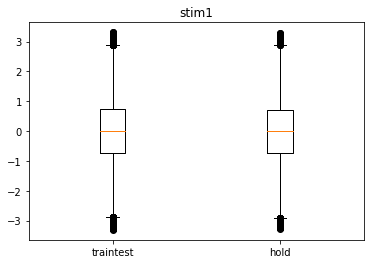

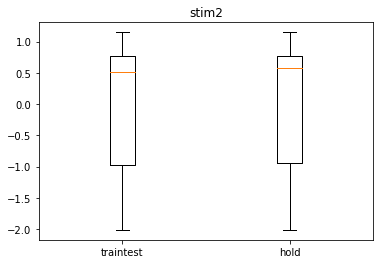

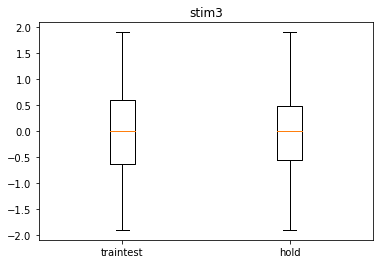

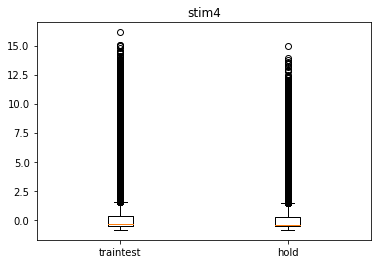

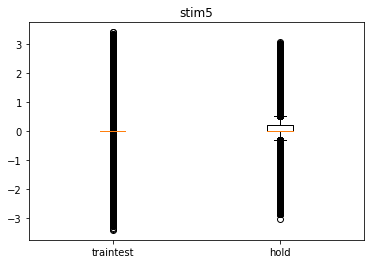

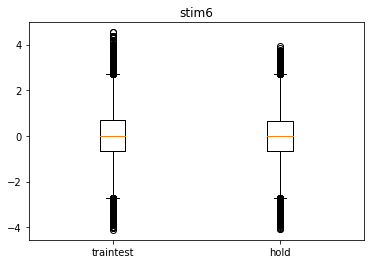

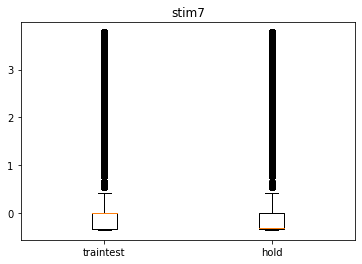

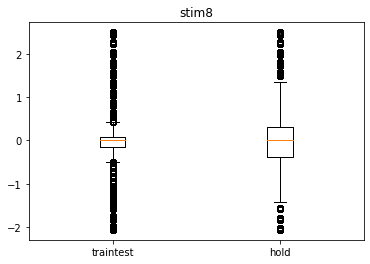

In [6]:
for s in [s for s in df.columns if 'stim' in s]:
  fig, ax = plt.subplots()
  plt.title(s)
  ax.boxplot([df[s].dropna(),df_HOLD[s].dropna()])
  ax.set_xticklabels(['traintest', "hold"])

In [7]:
!ls drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1

HOLDOUT_RAW_extracted_data_features.csv
TrainTest_RAW_extracted_data_features.csv


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

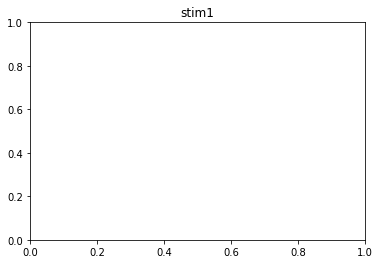

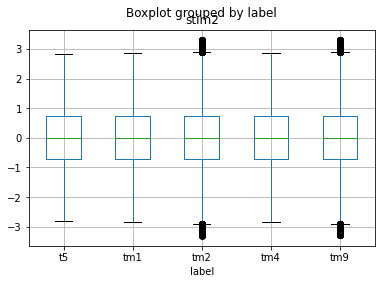

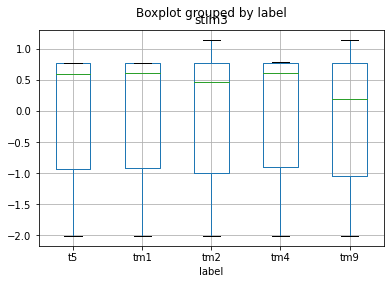

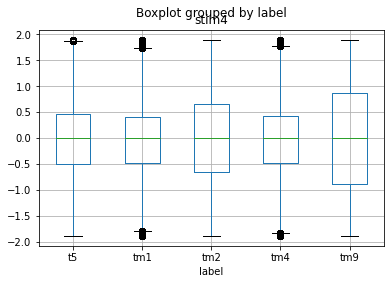

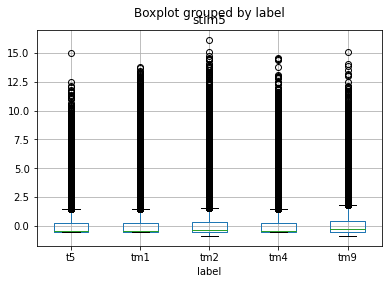

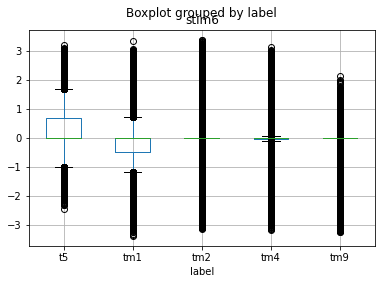

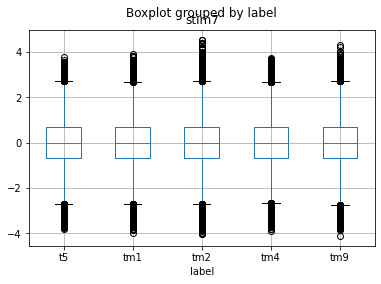

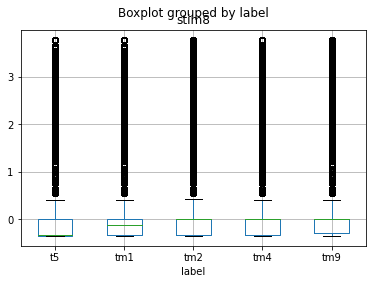

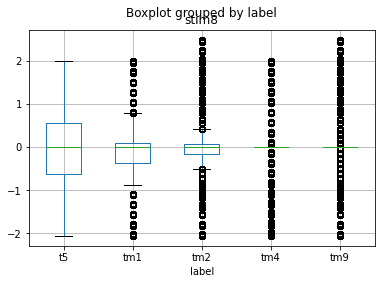

In [13]:
# By type
# training
for s in [s for s in df.columns if 'stim' in s]:
  plt.title(s)
  df.boxplot(column=s,by='label')

# Extracted Features

In [7]:
df_HOLD_ext = pd.read_csv('drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1/HOLDOUT_RAW_extracted_data_features.csv')
df_HOLD_ext

,Unnamed: 0,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,...,relation_stim1_PS-PS,relation_type_stim6,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group
0,0,1,t5,8,1,210809_2,0.217502,0.276790,0.776442,-0.001301,...,0.000000e+00,PS,7.216378e-11,2.790717e-16,NS,0.0,0.0,2.013887e-26,0.000000e+00,1
1,1,1,t5,8,2,210809_2,0.416828,0.276790,0.776442,-0.001301,...,0.000000e+00,PS,1.653759e-08,9.894077e-13,NS,0.0,0.0,1.636242e-20,0.000000e+00,1
2,2,1,t5,8,3,210809_2,0.354376,-0.551717,-1.050625,-1.773261,...,0.000000e+00,PS,1.354199e-07,2.692603e-11,NS,0.0,0.0,3.646319e-18,0.000000e+00,1
3,3,1,t5,8,4,210809_2,0.502063,-1.104055,-1.343779,-1.581956,...,0.000000e+00,PS,8.086540e-07,2.216457e-10,NS,0.0,0.0,1.792346e-16,0.000000e+00,1
4,4,1,t5,8,5,210809_2,0.332470,-1.104055,0.776442,-0.001301,...,0.000000e+00,PS,5.285532e-09,6.543285e-14,NS,0.0,0.0,3.458474e-22,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691492,691492,10,tm9,1,5497,210816_0,0.012834,0.723927,-1.568715,-1.344984,...,0.000000e+00,PS,2.906709e-09,8.282521e-14,PS,0.0,0.0,0.000000e+00,2.407488e-22,10
691493,691493,10,tm9,1,5498,210816_0,0.017510,0.660119,0.410886,-1.260188,...,0.000000e+00,PS,1.235647e-08,6.317373e-13,PS,0.0,0.0,0.000000e+00,7.806041e-21,10
691494,691494,10,tm9,1,5499,210816_0,0.071367,0.660119,0.772401,0.007249,...,0.000000e+00,PS,1.903339e-07,8.094906e-12,PS,0.0,0.0,0.000000e+00,1.540735e-18,10
691495,691495,10,tm9,1,5500,210816_0,0.046596,0.660119,0.772401,0.007249,...,2.757963e-17,PS,6.542141e-08,1.857758e-12,PS,0.0,0.0,0.000000e+00,1.215371e-19,10


In [8]:
df_ext = pd.read_csv('drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/5_frames_stim1/TrainTest_RAW_extracted_data_features.csv')
df_ext

,Unnamed: 0,stack,label,roi,frame,movie_ID,resp,stim1,stim2,stim3,...,relation_stim1_PS-PS,relation_type_stim6,relation_stim6,relation_stim6_+5,relation_type_stim6_+5,relation_stim6_NS-NS,relation_stim6_NS-PS,relation_stim6_PS-NS,relation_stim6_PS-PS,frame_group
0,0,1,tm9,1,0,210728_0,0.119422,1.827970,-0.668979,-1.323903,...,0.0,PS,6.131515e-15,1.709783e-19,NS,0.000000e+00,0.0,1.048356e-33,0.000000e+00,1
1,1,1,tm9,1,1,210728_0,0.065380,0.676591,1.133205,0.209498,...,0.0,PS,1.404623e-10,2.707063e-14,NS,0.000000e+00,0.0,3.802402e-24,0.000000e+00,1
2,2,1,tm9,1,2,210728_0,0.036917,-1.276472,-0.881429,1.220991,...,0.0,PS,7.426788e-10,2.085457e-13,NS,0.000000e+00,0.0,1.548825e-22,0.000000e+00,1
3,3,1,tm9,1,3,210728_0,0.156975,-1.676237,0.505447,1.208871,...,0.0,PS,1.971844e-08,9.885126e-13,NS,0.000000e+00,0.0,1.949192e-20,0.000000e+00,1
4,4,1,tm9,1,4,210728_0,0.195883,-1.351235,-0.832430,1.249990,...,0.0,PS,3.232196e-08,1.051521e-12,NS,0.000000e+00,0.0,3.398724e-20,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688505,3688505,9,tm1,10,5490,210816_1,0.074290,0.570051,0.754433,0.311900,...,0.0,PS,3.263303e-09,2.459124e-13,PS,0.000000e+00,0.0,0.000000e+00,8.024868e-22,10
3688506,3688506,9,tm1,10,5491,210816_1,0.086649,0.570051,0.772721,0.007225,...,0.0,PS,3.979294e-09,2.972849e-13,PS,0.000000e+00,0.0,0.000000e+00,1.182984e-21,10
3688507,3688507,9,tm1,10,5492,210816_1,0.034598,0.570051,0.772721,0.007225,...,0.0,PS,6.265856e-11,2.466365e-17,NS,0.000000e+00,0.0,1.545389e-27,0.000000e+00,10
3688508,3688508,9,tm1,10,5497,210816_1,0.229270,-1.064034,-1.657355,1.230574,...,0.0,NS,1.621214e-09,2.750217e-14,NS,4.458690e-23,0.0,0.000000e+00,0.000000e+00,10


In [9]:
sv_path = 'drive/MyDrive/DS6011_Capstone_VisualNeuroscience/images/'

In [9]:
! ls drive/MyDrive/DS6011_Capstone_VisualNeuroscience/images/

stim8_feature.png


In [43]:
files = os.listdir(sv_path)
col_not = [f.split('-_-')[0] for f in files]
col_not

['stim2_feature',
 'stim2_feature',
 'stim3_feature',
 'stim3_feature',
 'stim5_feature',
 'stim5_feature',
 'stim4_feature',
 'stim4_feature',
 'stim7_feature',
 'stim7_feature',
 'stim8_feature',
 'stim8_feature',
 'relation_stim1',
 'relation_stim1',
 'relation_stim1_+5',
 'relation_stim1_+5',
 'relation_stim1_NS-NS',
 'relation_stim1_NS-NS',
 'relation_stim1_NS-PS',
 'relation_stim1_NS-PS',
 'relation_stim1_PS-NS',
 'relation_stim1_PS-NS',
 'relation_stim1_PS-PS',
 'relation_stim1_PS-PS']

In [44]:
columns = df_ext.columns
col_not = col_not + ['Unnamed: 0', 'stack', 'label', 'roi', 'frame', 'movie_ID', 'resp',
       'stim1', 'stim2', 'stim3', 'stim4', 'stim5', 'stim6', 'stim7', 'stim8','frame_group','relation_type_stim1','relation_type_stim1_+5','relation_type_stim6_+5','relation_type_stim6']
columns = [c for c in columns if c not in col_not]
columns

['relation_stim6',
 'relation_stim6_+5',
 'relation_stim6_NS-NS',
 'relation_stim6_NS-PS',
 'relation_stim6_PS-NS',
 'relation_stim6_PS-PS']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

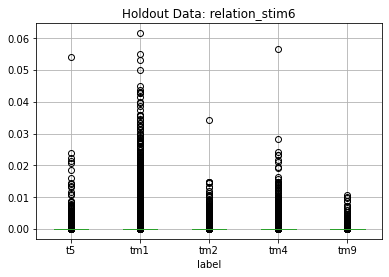

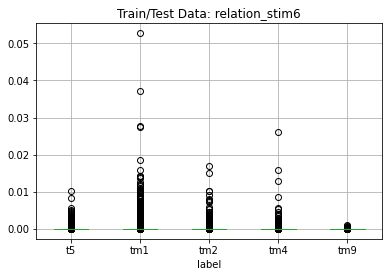

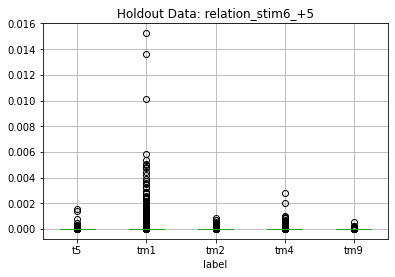

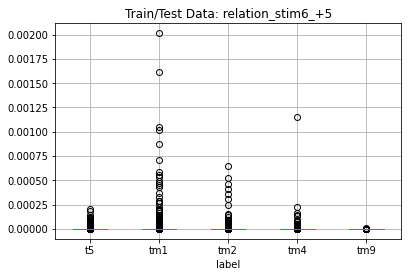

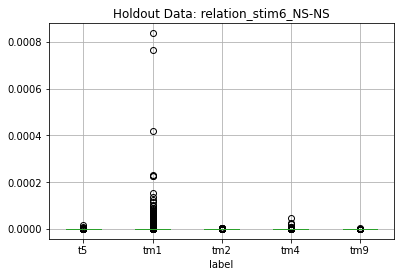

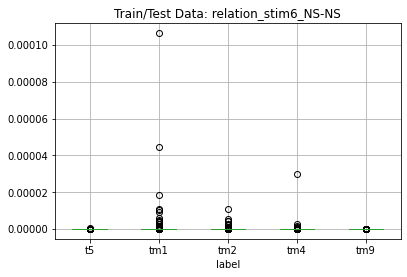

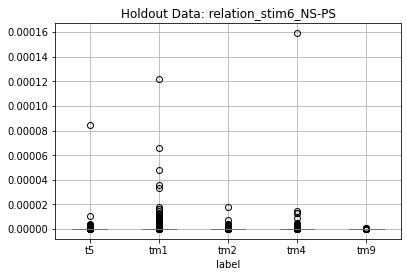

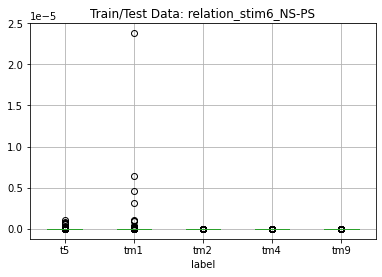

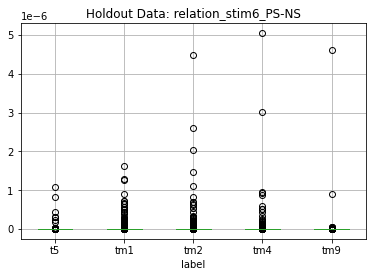

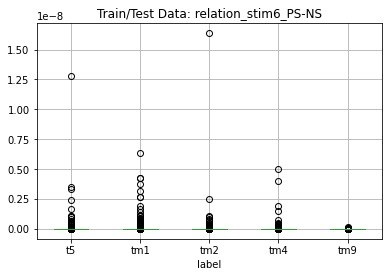

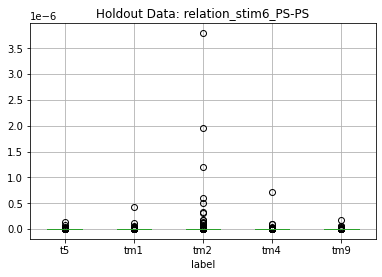

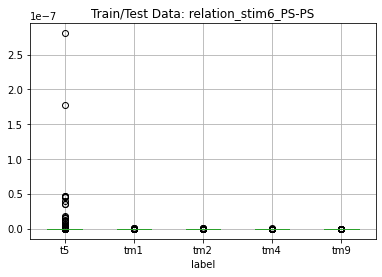

In [45]:
for s in columns:
  # holdout plots
  df_HOLD_ext.boxplot(column=s,by='label')
  plt.title('Holdout Data: ' + s)
  plt.suptitle('')
  plt.savefig(sv_path + '{}-_-HOLD.png'.format(s))

  # train test plots
  df_ext.boxplot(column=s,by='label')
  plt.title('Train/Test Data: ' + s)
  plt.suptitle('')
  plt.savefig(sv_path + '{}-_-TrainTest.png'.format(s))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


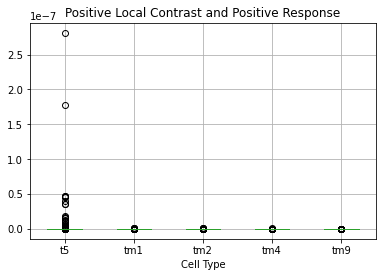

In [18]:
  df_ext.boxplot(column='relation_stim6_PS-PS',by='label')
  plt.title('Positive Local Contrast and Positive Response')

  plt.suptitle('')
  plt.xlabel('Cell Type')
  # plt.figure(figsize=4,5)
  plt.savefig(sv_path + 'stim6-psps.png', bbox_inches = 'tight',pad_inchesfloat='1')
  

In [13]:
df_HOLD_ext.columns

Index(['Unnamed: 0', 'stack', 'label', 'roi', 'frame', 'movie_ID', 'resp',
       'stim1', 'stim2', 'stim3', 'stim4', 'stim5', 'stim6', 'stim7', 'stim8',
       'stim2_feature', 'stim3_feature', 'stim5_feature', 'stim4_feature',
       'stim7_feature', 'stim8_feature', 'relation_type_stim1',
       'relation_stim1', 'relation_stim1_+5', 'relation_type_stim1_+5',
       'relation_stim1_NS-NS', 'relation_stim1_NS-PS', 'relation_stim1_PS-NS',
       'relation_stim1_PS-PS', 'relation_type_stim6', 'relation_stim6',
       'relation_stim6_+5', 'relation_type_stim6_+5', 'relation_stim6_NS-NS',
       'relation_stim6_NS-PS', 'relation_stim6_PS-NS', 'relation_stim6_PS-PS',
       'frame_group'],
      dtype='object')

In [42]:
df_ext[columns].dtypes

relation_stim1          float64
relation_stim1_+5       float64
relation_stim1_NS-NS    float64
relation_stim1_NS-PS    float64
relation_stim1_PS-NS    float64
relation_stim1_PS-PS    float64
relation_type_stim6      object
relation_stim6          float64
relation_stim6_+5       float64
relation_stim6_NS-NS    float64
relation_stim6_NS-PS    float64
relation_stim6_PS-NS    float64
relation_stim6_PS-PS    float64
dtype: object